In [1]:
from nba_api.stats.endpoints import playergamelog
import pandas as pd
import matplotlib.pyplot as plt
import time
import numpy as np

%matplotlib inline

In [2]:
def seasons_string(start_year,end_year):
    '''
    creates a list of NBA seasons from start-end
    '''
    years = np.arange(start_year,end_year)
    seasons = []
    for year in years:
        string1 = str(year)
        string2 = str(year+1)
        season = '{}-{}'.format(string1,string2[-2:])
        seasons.append(season)
    return seasons

### Download data using nba_api

In [3]:
curry = []
harden = []

for season in seasons_string(2009,2021):
    curry.append(playergamelog.PlayerGameLog(player_id='201939',season=season).get_data_frames()[0])
    time.sleep(1)

for season in seasons_string(2009,2021):
    harden.append(playergamelog.PlayerGameLog(player_id='201935',season=season).get_data_frames()[0])
    time.sleep(1)

### Data Wrangling

In [4]:
curry = pd.concat(curry,ignore_index=True)
curry['date'] = pd.to_datetime(curry['GAME_DATE'])
curry['age'] = (curry['date'] - pd.to_datetime('March 14, 1988'))/np.timedelta64(1, 'Y')
curry.sort_values(by='date',inplace=True)

harden = pd.concat(harden,ignore_index=True)
harden['date'] = pd.to_datetime(harden['GAME_DATE'])
harden['age'] = (harden['date'] - pd.to_datetime('August 26, 1989'))/np.timedelta64(1, 'Y')
harden.sort_values(by='date',inplace=True)

### Data to Plot

In [5]:
ycurry = curry['FG3M'].cumsum()
xcurry1 = np.arange(1,len(ycurry)+1)
yharden = harden['FG3M'].cumsum()
xharden1 = np.arange(1,len(yharden)+1)
xcurry2 = curry['age']
xharden2 = harden['age']

### Plot Data

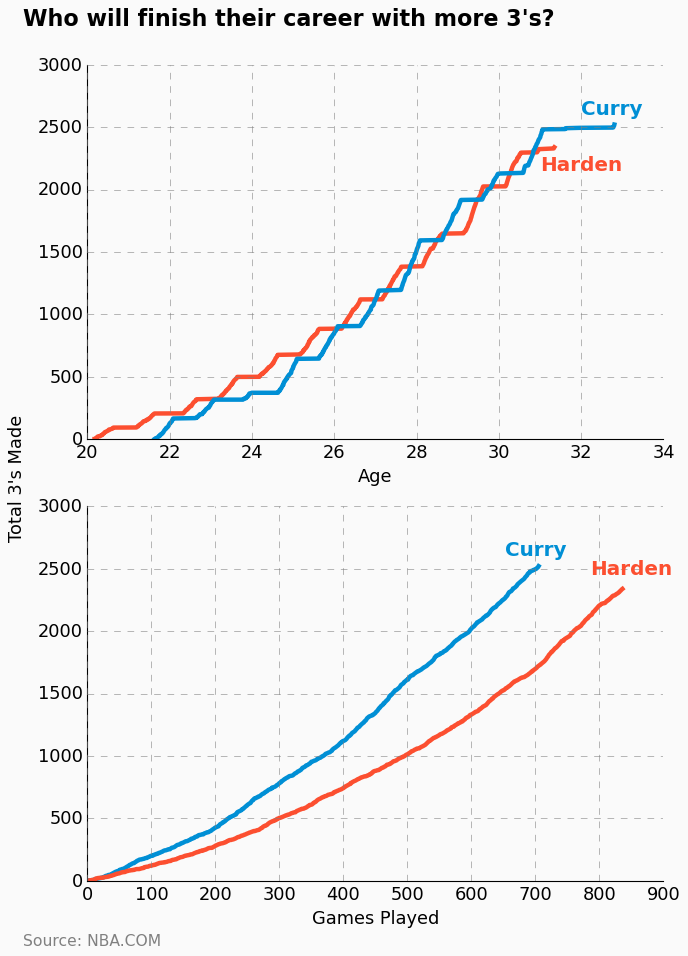

In [6]:
plt.style.use('classic')
    
fig = plt.figure(figsize=(8,12))

bg_color = (0.98,0.98,0.98)
fig.set_facecolor(bg_color)

# create labels and title for figure
# fig.text(0.01,0.01,'By: Me',fontsize=14.0,color='gray',
#          horizontalalignment='left',verticalalignment='bottom')
fig.text(0.01,0.01,'Source: NBA.COM',fontsize=14.0,color='gray',
         horizontalalignment='left',verticalalignment='bottom')

fig.text(0.01,0.99,'Who will finish their career with more 3\'s?',fontsize=20.0,
        horizontalalignment='left',weight="bold",verticalalignment='top')

ax_left = 0.11
ax_bottom = 0.08
ax_width = 0.9
ax_height = 0.85

h_margin = 0.07

fig_width = ax_width
fig_height = (ax_height - h_margin)/2 

ws = np.tile(np.arange(ax_left,ax_width+ax_left,fig_width),(1,2)).flatten()
hs = np.tile(np.arange(ax_bottom,ax_height+ax_bottom,fig_height+h_margin)[::-1],(1,1)).T.flatten()

ax = []

for i in range(2):
    ax.append(fig.add_axes([ws[i], hs[i], fig_width, fig_height]))
    ax[i].set_facecolor(bg_color)   
    ax[i].grid('on', linestyle='--',color='gray')
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[i].axes.tick_params(length=0)
    ax[i].tick_params(labelsize=16)
    

### Here we do the actual plotting
colors = ['#008fd5', '#fc4f30', '#e5ae38', '#6d904f', '#8b8b8b', '#810f7c']

ax[1].plot(xcurry1,ycurry,'-',color=colors[0],linewidth=4,label='Curry')
ax[1].plot(xharden1,yharden,'-',color=colors[1],linewidth=4,label='Harden')
ax[1].set_xlabel('Games Played',fontsize=16)
# ax[0].legend(loc='upper left',frameon=False,fontsize=20,prop={'weight':'bold'})

ax[0].plot(xharden2,yharden,'-',color=colors[1],linewidth=4)
ax[0].plot(xcurry2,ycurry,'-',color=colors[0],linewidth=4)
ax[0].set_xlabel('Age',fontsize=16)

ax[0].text(32.75,2650,'Curry',fontsize=18.0,weight="bold",color=colors[0],horizontalalignment='center',verticalalignment='center')
ax[0].text(32,2200,'Harden',fontsize=18.0,weight="bold",color=colors[1],horizontalalignment='center',verticalalignment='center')

ax[1].text(700,2650,'Curry',fontsize=18.0,weight="bold",color=colors[0],horizontalalignment='center',verticalalignment='center')
ax[1].text(850,2500,'Harden',fontsize=18.0,weight="bold",color=colors[1],horizontalalignment='center',verticalalignment='center')
fig.text(0,0.5,'Total 3\'s Made',fontsize=16.0,color='black',rotation=90,
               horizontalalignment='center',verticalalignment='center')

fig.savefig('curry_vs_harden.png',bbox_inches='tight',facecolor=fig.get_facecolor(), edgecolor='none')